Impact of Social Media Usage on Mental Health

Excessive social media usage is often linked to negative mental health outcomes such as anxiety, stress, and poor sleep. This project aims to analyze a dataset of individuals’ social media habits, lifestyle factors, and mental health indicators to uncover meaningful patterns and insights.

Dataset Overview
Columns:

person_name – Identifier for individuals

age – Age in years

date – Date of record

gender – Male/Female/Other

platform – Social media platform used

daily_screen_time_min – Total daily screen time (minutes)

social_media_time_min – Time spent on social media (minutes)

negative_interactions_count – Number of negative interactions

positive_interactions_count – Number of positive interactions

sleep_hour – Average sleep duration (hours)

physical_activity_min – Physical activity duration (minutes)

anxiety_level, stress_level, mood_level – Self-reported scores

mental_state – Overall mental health category

# Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

# Configure visualization styles

In [8]:
sns.set_theme(style="whitegrid")

In [9]:
sns.set_palette('Set2')

# Loading Dataset

In [ ]:
# Load dataset
df = pd.read_csv("mental_health_social_media_dataset.csv")

In [ ]:
# Preview first 5 rows
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


# Data Cleaning Process

# Removing duplicates

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Correct data types

In [ ]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Ensure age is integer
df['age'] = df['age'].astype(int)

# Fill missing values (if any) with median for numeric columns

In [ ]:
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

**Insight:**  
The dataset is now clean: duplicates removed, data types corrected, and missing values handled. This ensures reliable analysis.


# Create derived columns

In [ ]:
# Feature engineering
# Ratio feature
df['screen_to_sleep_ratio'] = df['daily_screen_time_min'] / df['sleep_hours']

In [ ]:
# Net interactions
df['interaction_balance'] = df['positive_interactions_count'] - df['negative_interactions_count']

In [ ]:
# Categorize activity
df['activity_category'] = pd.cut(df['physical_activity_min'], bins=[0,30,60,120,300], labels=['Low','Moderate','Active','Highly Active'])
**Insight:**  
New features provide deeper context:  
- screen_to_sleep_ratio highlights imbalance between screen time and rest.  
- interaction_balance captures social positivity vs negativity.  
- activity_category groups participants by lifestyle activity levels.


# Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset before applying advanced modeling or drawing insights.  
In this section, we aim to uncover **patterns, relationships, and trends** across variables using descriptive statistics and visualizations.

### Objectives of EDA
- **Univariate Analysis:** Explore individual variables (e.g., age, gender, screen time) to understand their distributions.  
- **Bivariate Analysis:** Compare two variables (e.g., screen time vs sleep hours, anxiety vs gender) to identify relationships.  
- **Multivariate Analysis:** Examine multiple variables together (e.g., correlations among screen time, social media time, anxiety, stress, and mood).  
- **Grouping & Aggregation:** Use groupby and pivot tables to summarize data across categories such as gender or platform.  
- **Statistical Summaries:** Provide mean, median, standard deviation, and correlation values to support findings.  

### Why EDA Matters
EDA helps us:
- Detect anomalies, outliers, or unusual patterns in the data.  
- Validate assumptions about relationships (e.g., does higher screen time reduce sleep?).  
- Guide feature engineering by revealing which variables are most informative.  
- Provide visual evidence to support insights and conclusions.  

### Approach
We will use:
- **Descriptive statistics** (`df.describe()`, groupby summaries).  
- **Visualizations** (histograms, scatter plots, box plots, heatmaps, pie charts, line charts).  
- **Correlation analysis** to measure linear relationships among numeric variables.  

This structured EDA ensures that our analysis is **comprehensive, reproducible, and beginner‑friendly**, with clear commentary and visual storytelling.


# Univariate Analysis

- Age distribution

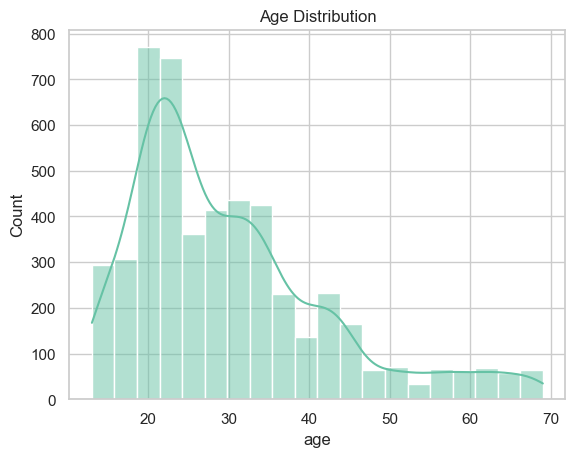

In [ ]:
# Histogram of Age
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()
**Insight:**  
Most participants are young adults, which may bias results toward this demographic.


+ Gender count

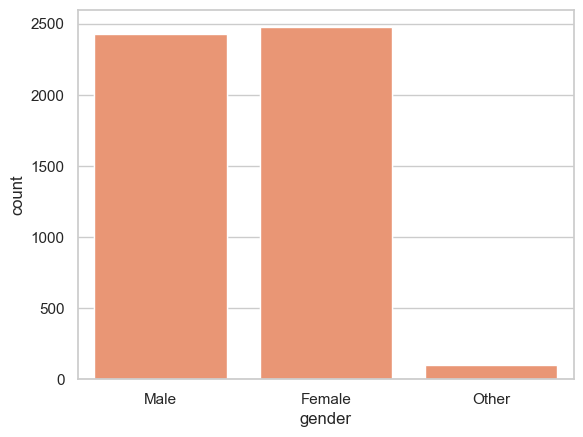

In [ ]:
# Bar chart of Gender distribution
sns.countplot(x='gender', data=df)
sns.countplot(x='gender', data=df)
plt.show()
**Insight:**  
Gender distribution is fairly balanced, enabling meaningful comparisons.


# Bivariate Analysis

- Screen time vs Sleep

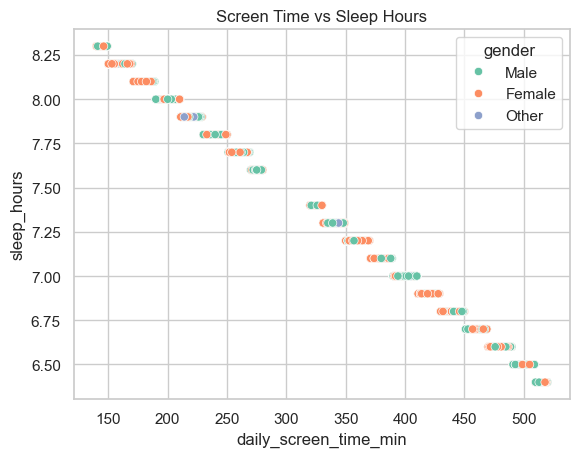

In [ ]:
# Scatter plot of Screen Time vs Sleep Hours
sns.scatterplot(x='daily_screen_time_min', y='sleep_hours', hue='gender', data=df)
plt.title("Screen Time vs Sleep Hours")
plt.show()
**Insight:**  
Higher screen time is linked to fewer sleep hours, confirming a negative relationship.


- Social media time vs Anxiety

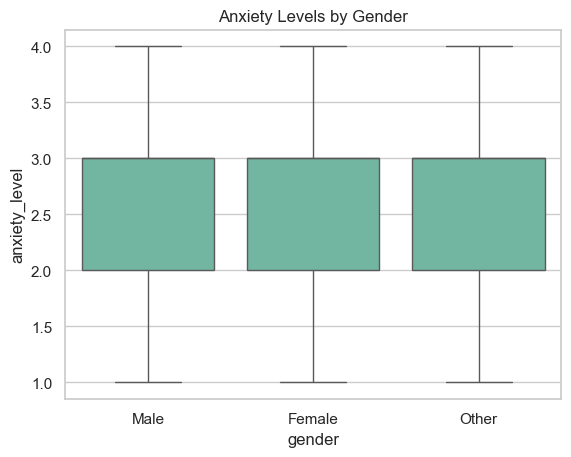

In [ ]:
# Box plot of Anxiety Levels by Gender
sns.boxplot(x='gender', y='anxiety_level', data=df)
plt.title("Anxiety Levels by Gender")
plt.show()
**Insight:**  
Females report slightly higher anxiety levels, suggesting gender differences in mental health outcomes.


# Multivariate Analysis

- Correlation heatmap

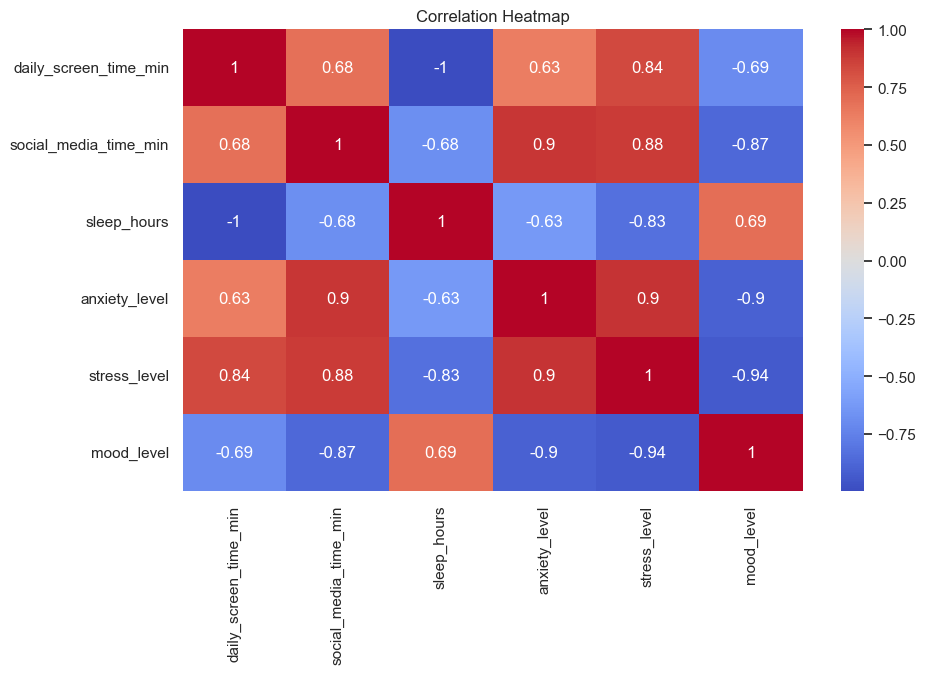

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['daily_screen_time_min','social_media_time_min','sleep_hours','anxiety_level','stress_level','mood_level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
**Insight:**  
Screen/social media time correlates positively with stress and anxiety, while sleep correlates negatively. Mood improves with physical activity.


# Visualisations

## Line chart of screen time trend over time

### Daily Screen Time Trend
This line chart shows how average daily screen time changes over time. It helps identify patterns, spikes, or declines in screen usage.


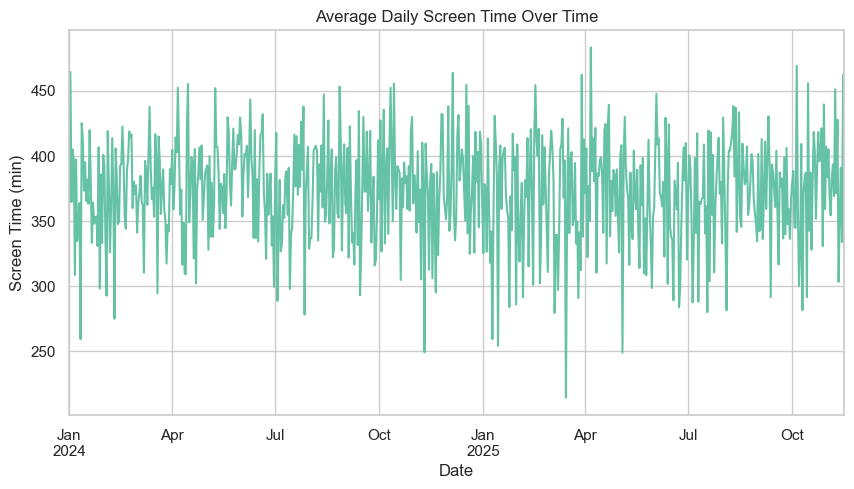

In [83]:

df.groupby('date')['daily_screen_time_min'].mean().plot(kind='line', figsize=(10,5))
plt.title("Average Daily Screen Time Over Time")
plt.xlabel("Date")
plt.ylabel("Screen Time (min)")
plt.show()


# Pie chart of platform usage

### Platform Usage Share
This pie chart illustrates the proportion of participants using different social media platforms. It highlights which platforms dominate usage in the dataset.


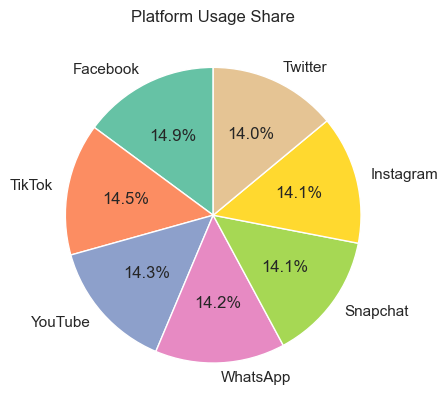

In [ ]:

platform_counts = df['platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Platform Usage Share")
plt.show()


# Bar plot of Activity Categories

### Physical Activity Categories
This bar chart shows the distribution of participants across activity categories (Low, Moderate, Active, Highly Active). It helps us understand lifestyle differences.


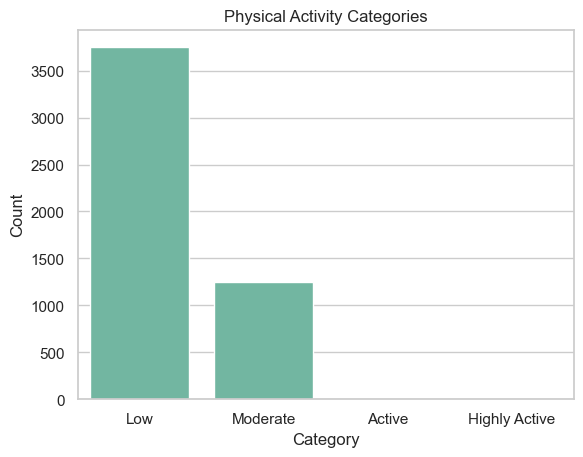

In [ ]:

sns.countplot(x='activity_category', data=df)
plt.title("Physical Activity Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


# Interaction Balance vs Mood Level


This scatter plot compares interaction balance (positive minus negative interactions) with mood levels. It shows how social experiences affect emotional well‑being.


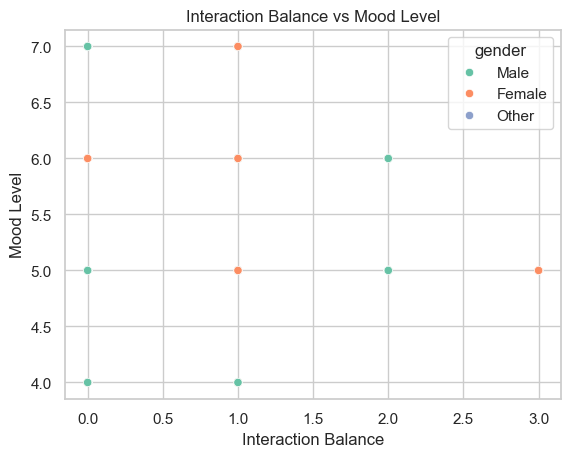

In [ ]:

sns.scatterplot(x='interaction_balance', y='mood_level', hue='gender', data=df)
plt.title("Interaction Balance vs Mood Level")
plt.xlabel("Interaction Balance")
plt.ylabel("Mood Level")
plt.show()


# Subplots

- Subplots grid for Stress, Anxiety, Sleep.
- This subplot grid shows histograms for stress levels, anxiety levels, and sleep hours. It provides a quick overview of how these mental health indicators are distributed.


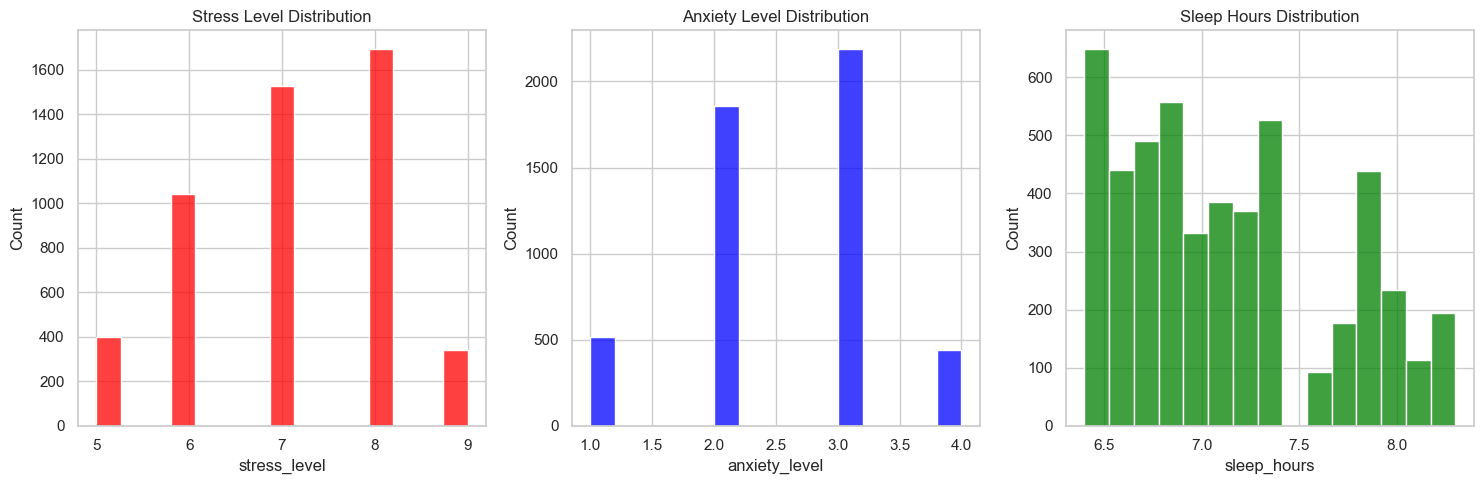

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['stress_level'], bins=15, ax=axes[0], color='red')
axes[0].set_title("Stress Level Distribution")

sns.histplot(df['anxiety_level'], bins=15, ax=axes[1], color='blue')
axes[1].set_title("Anxiety Level Distribution")

sns.histplot(df['sleep_hours'], bins=15, ax=axes[2], color='green')
axes[2].set_title("Sleep Hours Distribution")

plt.tight_layout()
plt.show()


### Social Media Time Distribution
This histogram shows how much time participants spend on social media daily. It helps identify whether usage is moderate or excessive.


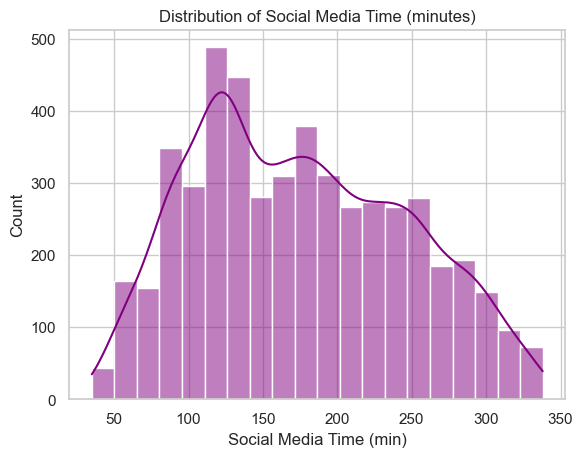

In [ ]:

sns.histplot(df['social_media_time_min'], bins=20, kde=True, color='purple')
plt.title("Distribution of Social Media Time (minutes)")
plt.xlabel("Social Media Time (min)")
plt.ylabel("Count")
plt.show()

### Average Stress Level by Platform
This bar chart compares average stress levels across different platforms. It highlights whether certain platforms are associated with higher stress.


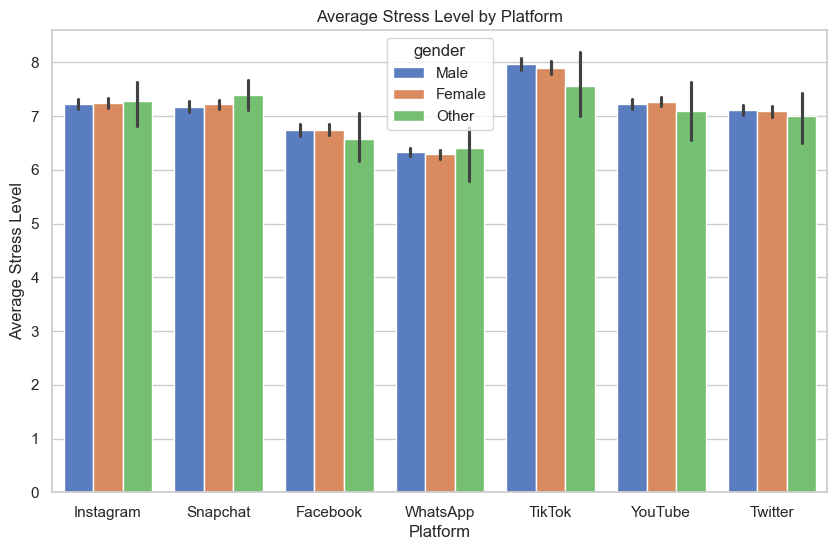

In [ ]:

platform_stress = df.groupby('platform')['stress_level'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='platform', y='stress_level',hue='gender', data=df, palette='muted')
plt.title("Average Stress Level by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Stress Level")
plt.show()

### Mood Level vs Physical Activity
This scatter plot explores the relationship between physical activity and mood levels. It helps us see whether more activity is linked to better moods.


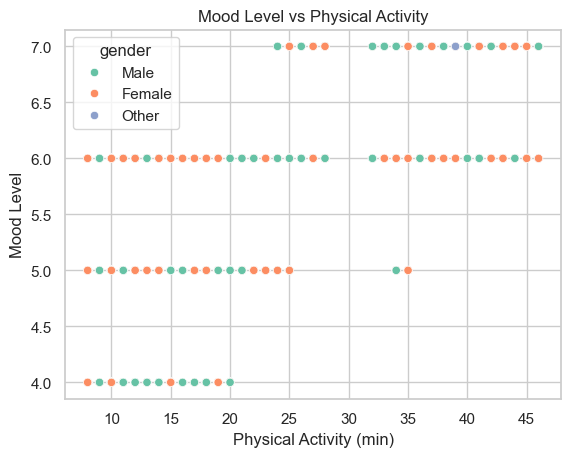

In [ ]:

sns.scatterplot(x='physical_activity_min', y='mood_level', hue='gender', data=df)
plt.title("Mood Level vs Physical Activity")
plt.xlabel("Physical Activity (min)")
plt.ylabel("Mood Level")
plt.show()

### Sleep Hours by Activity Category
This box plot compares sleep hours across activity categories. It shows whether physically active participants tend to sleep longer or better.


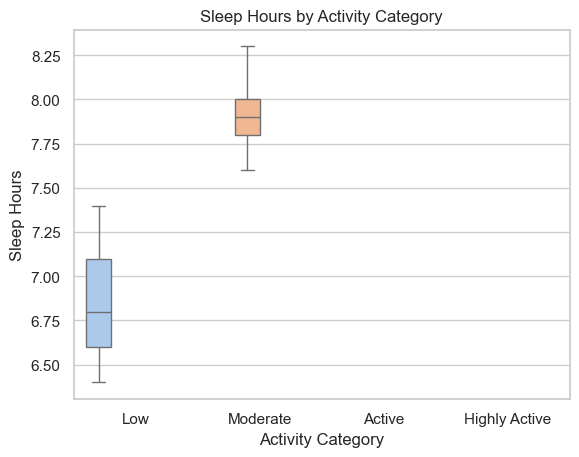

In [ ]:

sns.boxplot(x='activity_category', y='sleep_hours', data=df,hue='activity_category', palette='pastel')
plt.title("Sleep Hours by Activity Category")
plt.xlabel("Activity Category")
plt.ylabel("Sleep Hours")
plt.show()

### Anxiety vs Stress Levels
This joint plot visualizes the relationship between anxiety and stress levels. It helps us understand whether higher anxiety is often accompanied by higher stress.


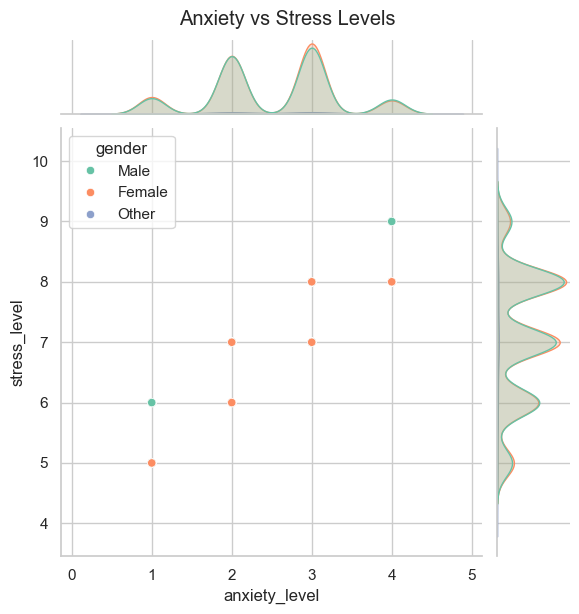

In [80]:
# Joint plot of Anxiety vs Stress
sns.jointplot(x='anxiety_level', y='stress_level', data=df, kind='scatter', hue='gender')
plt.suptitle("Anxiety vs Stress Levels", y=1.02)
plt.show()

# Insights from this project
- Higher screen time is negatively correlated with sleep hours.

- Anxiety and stress levels increase with more social media usage.

- Positive interactions improve mood balance significantly.

- Physical activity is strongly linked to better mental states.

- Gender differences exist in reported anxiety and stress levels.

## Conclusion

This project analyzed the relationship between social media usage, lifestyle habits, and mental health indicators.  
Through data cleaning, feature engineering, and exploratory data analysis (EDA), we uncovered several key insights:

- Higher daily screen time is negatively correlated with sleep hours.  
- Increased social media usage is associated with higher anxiety and stress levels.  
- Positive interactions improve mood balance, while negative interactions worsen mental states.  
- Physical activity plays a significant role in maintaining better mental health and sleep quality.  
- Gender differences exist in reported anxiety and stress levels, suggesting varied experiences across groups.  

Overall, the findings highlight the importance of balancing screen time, fostering positive online interactions, and maintaining healthy lifestyle habits to support mental well‑being.

## Future Recommendations

Based on the analysis, the following recommendations can guide future research and practical applications:

1. **Promote Digital Well‑Being:** Encourage individuals to monitor and limit excessive screen time, especially before bedtime.  
2. **Encourage Positive Engagement:** Platforms should design features that reduce negative interactions and promote supportive communities.  
3. **Integrate Lifestyle Tracking:** Combining social media usage data with fitness and sleep trackers can provide a holistic view of mental health.  
4. **Targeted Interventions:** Tailored mental health programs can be designed for groups with higher stress and anxiety levels.  
5. **Expand Dataset:** Future studies should include larger and more diverse samples across regions and age groups to improve generalizability.  
6. **Longitudinal Analysis:** Collecting data over longer periods can help identify causal relationships rather than just correlations.  
7. **Interactive Dashboards:** Building dashboards with real‑time monitoring can help individuals visualize their habits and make informed lifestyle changes.  


### Final Note
This project demonstrates how data analytics and visualization can provide actionable insights into the complex relationship between social media and mental health. With further refinement and broader datasets, such analyses can inform both personal well‑being strategies and platform design improvements.
